In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\user\Downloads\arecanut (2).csv"
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

# Separate features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

y

   Pixel-1  Pixel-2  Pixel-3  Pixel-4  Pixel-5  Pixel-6  Pixel-7  Pixel-8  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Pixel-9  Pixel-10  ...  Pixel-16376  Pixel-16377  Pixel-16378  Pixel-16379  \
0        0         0  ...            0            0            0            0   
1        0         0  ...            0            0            0            0   
2        0         0  ...            0            0            0            0   
3        0         0  ...            0            0            0            0   
4        0         0  ...            0            0            0            0   

   Pixel-16380  Pixel-16381  Pixel-16382  Pixel-16

array([2, 3, 3, ..., 1, 3, 3], dtype=int64)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
file_path = 'your_file.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

# Separate features and target variable
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values    # Last column as target

# Handle missing values (if any)
# Here we fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Encode categorical variables
# Assuming the first column is categorical; adjust the index accordingly
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose and train the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Accuracy: 0.81


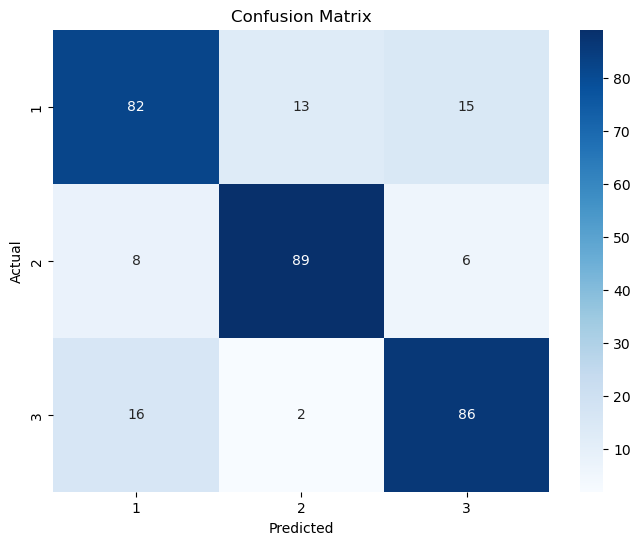

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.75      0.76       110
           2       0.86      0.86      0.86       103
           3       0.80      0.83      0.82       104

    accuracy                           0.81       317
   macro avg       0.81      0.81      0.81       317
weighted avg       0.81      0.81      0.81       317



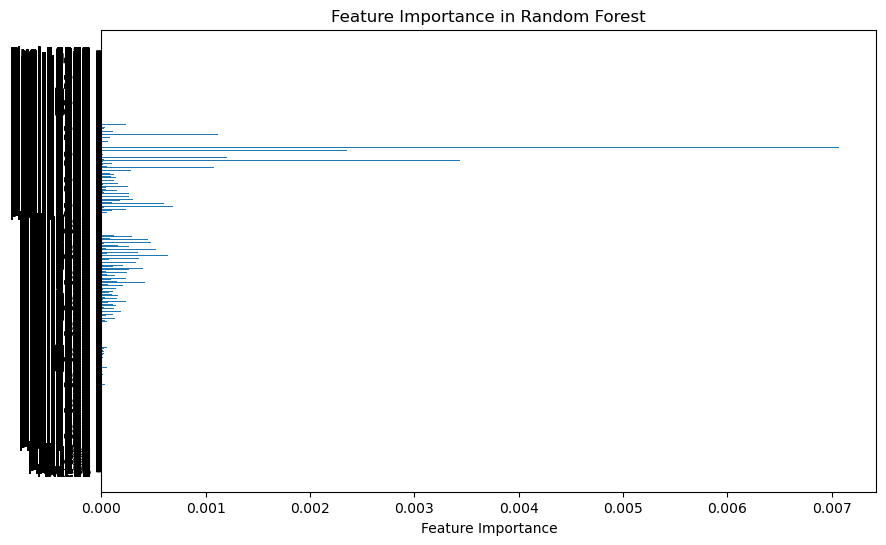

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=param_grid,
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), data.columns[:-1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

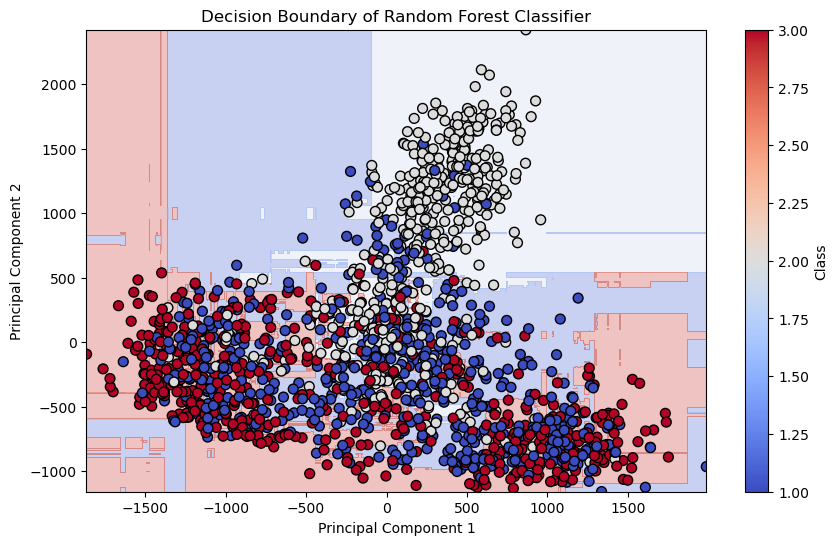

In [12]:

# from sklearn.decomposition import PCA



# # Decision Boundary Visualization
# # Reduce dimensions to 2D using PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# Train the model on the PCA-reduced data
#model_pca = RandomForestClassifier(random_state=1)
best_model.fit(X_pca, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Predict class for each point in the mesh grid
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot for training points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.coolwarm)
plt.title('Decision Boundary of Random Forest Classifier')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class')
plt.show()